In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
mall = pd.read_csv('Mall.csv')

In [33]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
mall.shape

(200, 5)

In [35]:
mall.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
# checking if there is any null values
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

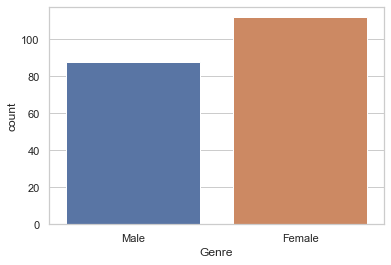

In [38]:
sns.countplot(x='Genre',data=mall)

Text(0, 0.5, '#Customers')

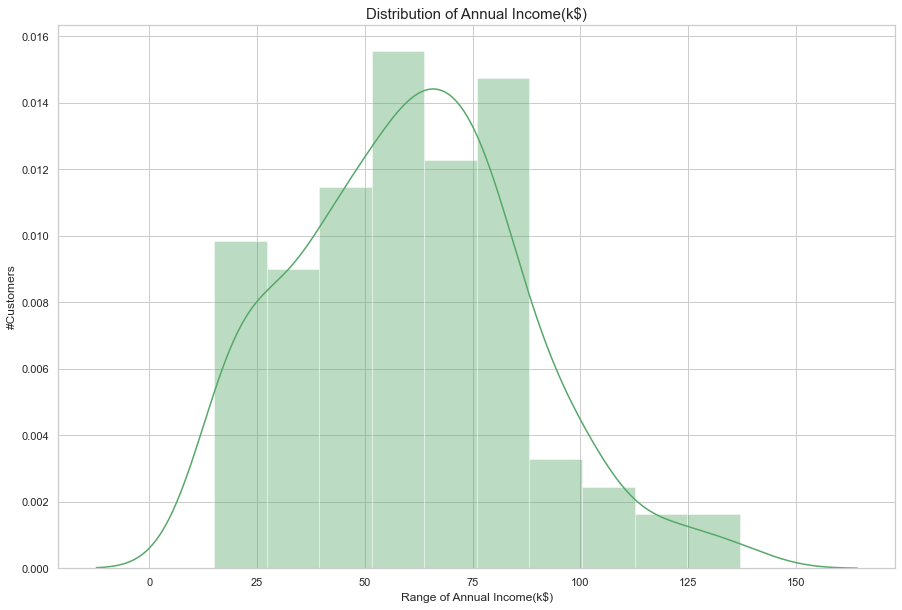

In [39]:
# annual distribution of income 
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(mall['Annual Income (k$)'],color='g')
plt.title('Distribution of Annual Income(k$)', fontsize = 15)
plt.xlabel('Range of Annual Income(k$)')
plt.ylabel('#Customers')

Text(0, 0.5, '#Customers')

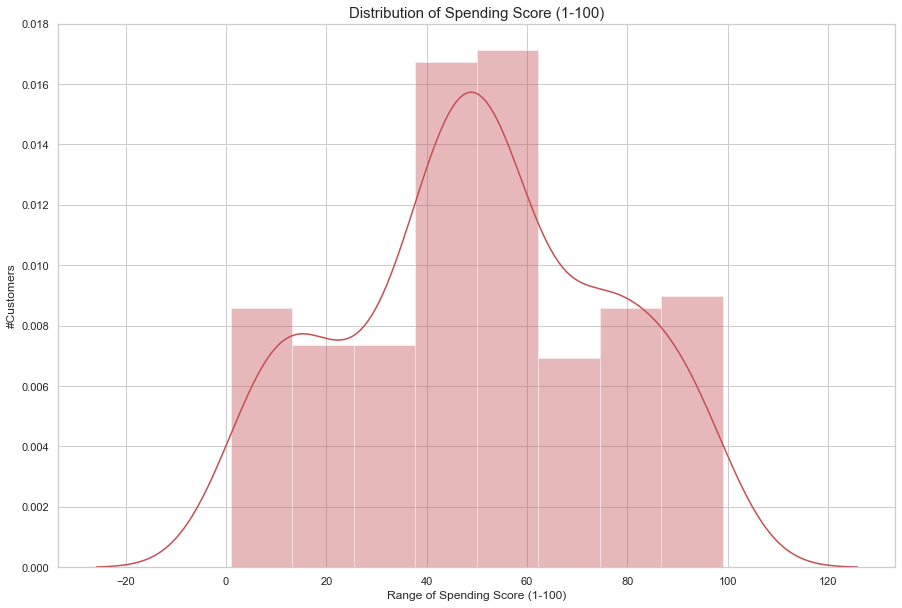

In [40]:
# distrubution of spending scores
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(mall['Spending Score (1-100)'],color='r')
plt.title('Distribution of Spending Score (1-100)', fontsize = 15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('#Customers')

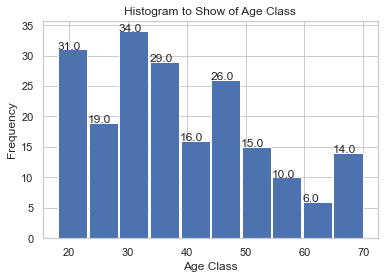

In [41]:
# Histogram used by deafult 10 bins . bins like range.
my_bins = 10 
arr=plt.hist(mall['Age'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Age Class')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

In [42]:
# encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
mall['Genre']= le.fit_transform(mall['Genre']) 

In [43]:
# where 1 is male and 0 is female
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<AxesSubplot:>

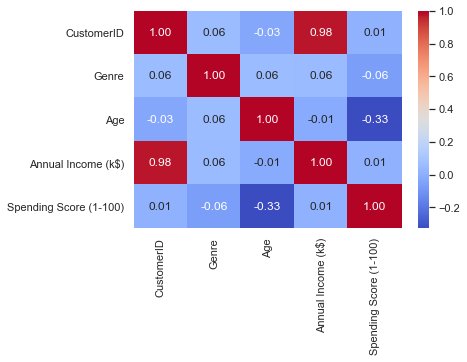

In [44]:
# to find the corelation 
sns.heatmap(mall.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

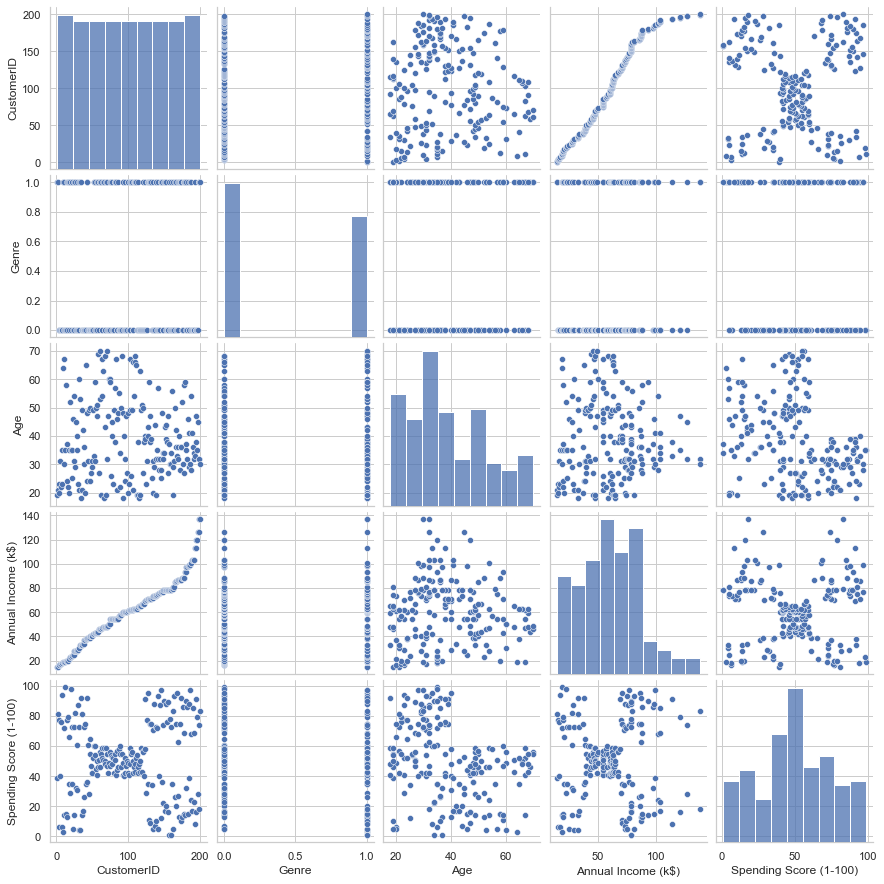

In [45]:
sns.pairplot(mall)

In [46]:
# K-Means Algorithm
# K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

# Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. In here we used elbow Method.

# Elbow Method

# The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line

In [47]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS


In [52]:
# annual income and spending score 
X = mall.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

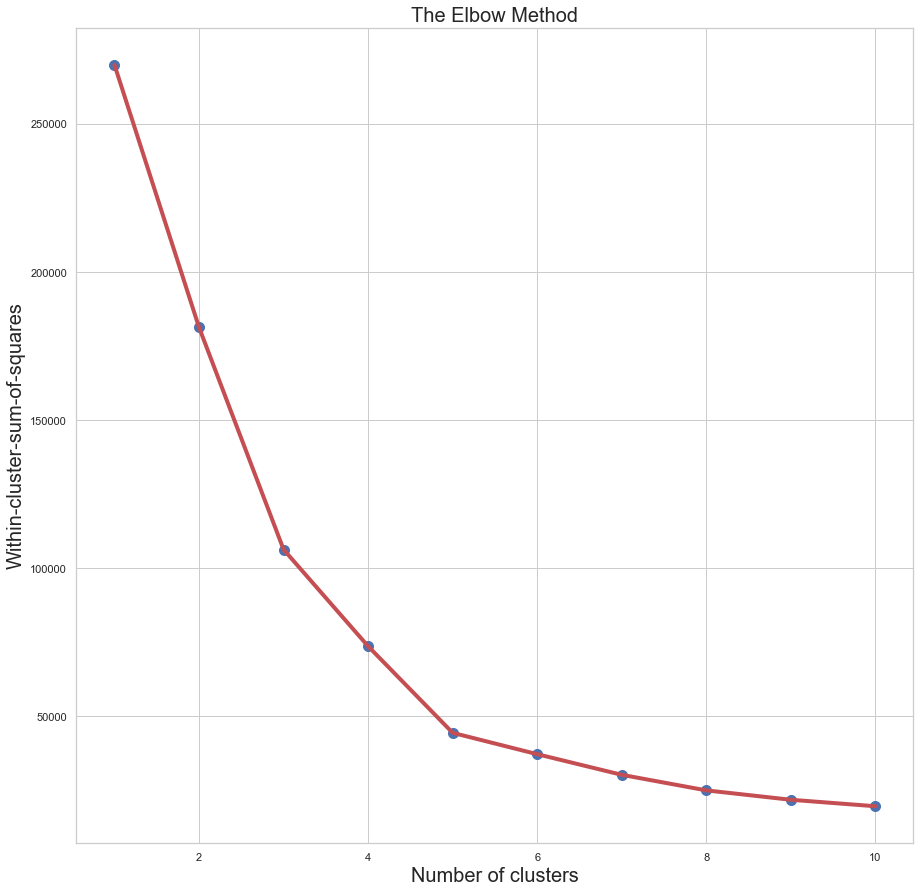

In [54]:
# Use of the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,15))
plt.scatter(range(1, 11),wcss,c='b',s=100)
plt.plot(range(1, 11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

In [55]:
# Train the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

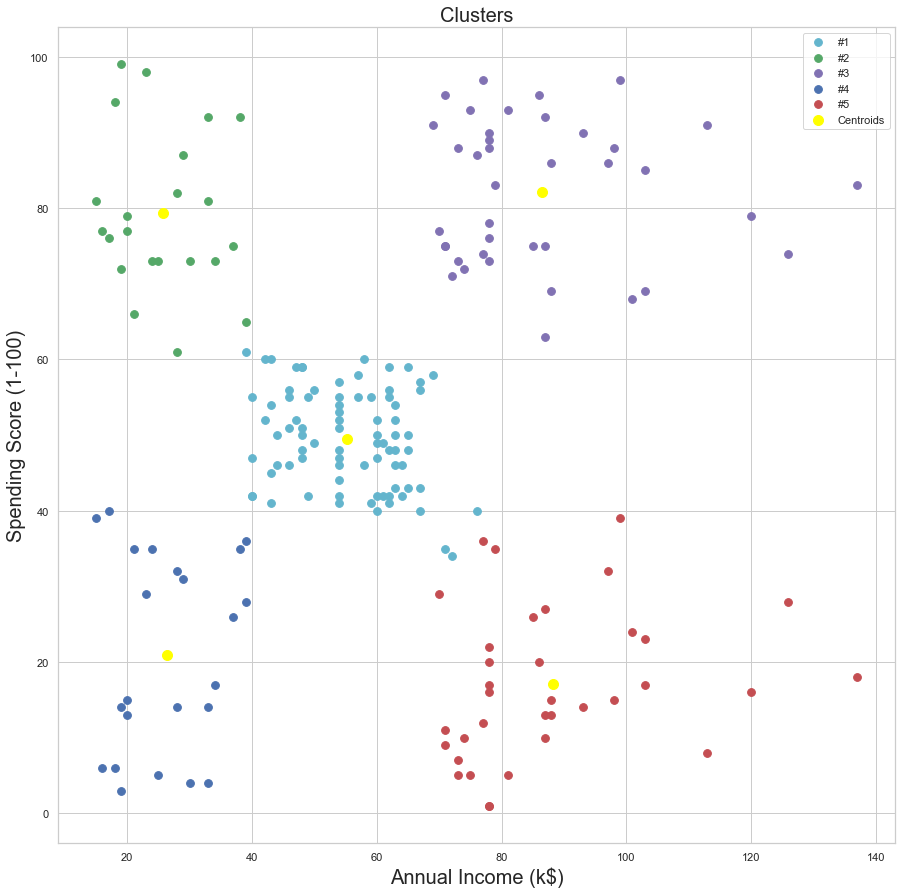

In [56]:
# Visualization of the clusters of customers
plt.figure(figsize=(15,15))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'c', label = '#1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'g', label = '#2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'm', label = '#3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'b', label = '#4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'r', label = '#5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Hierarchical Clustering

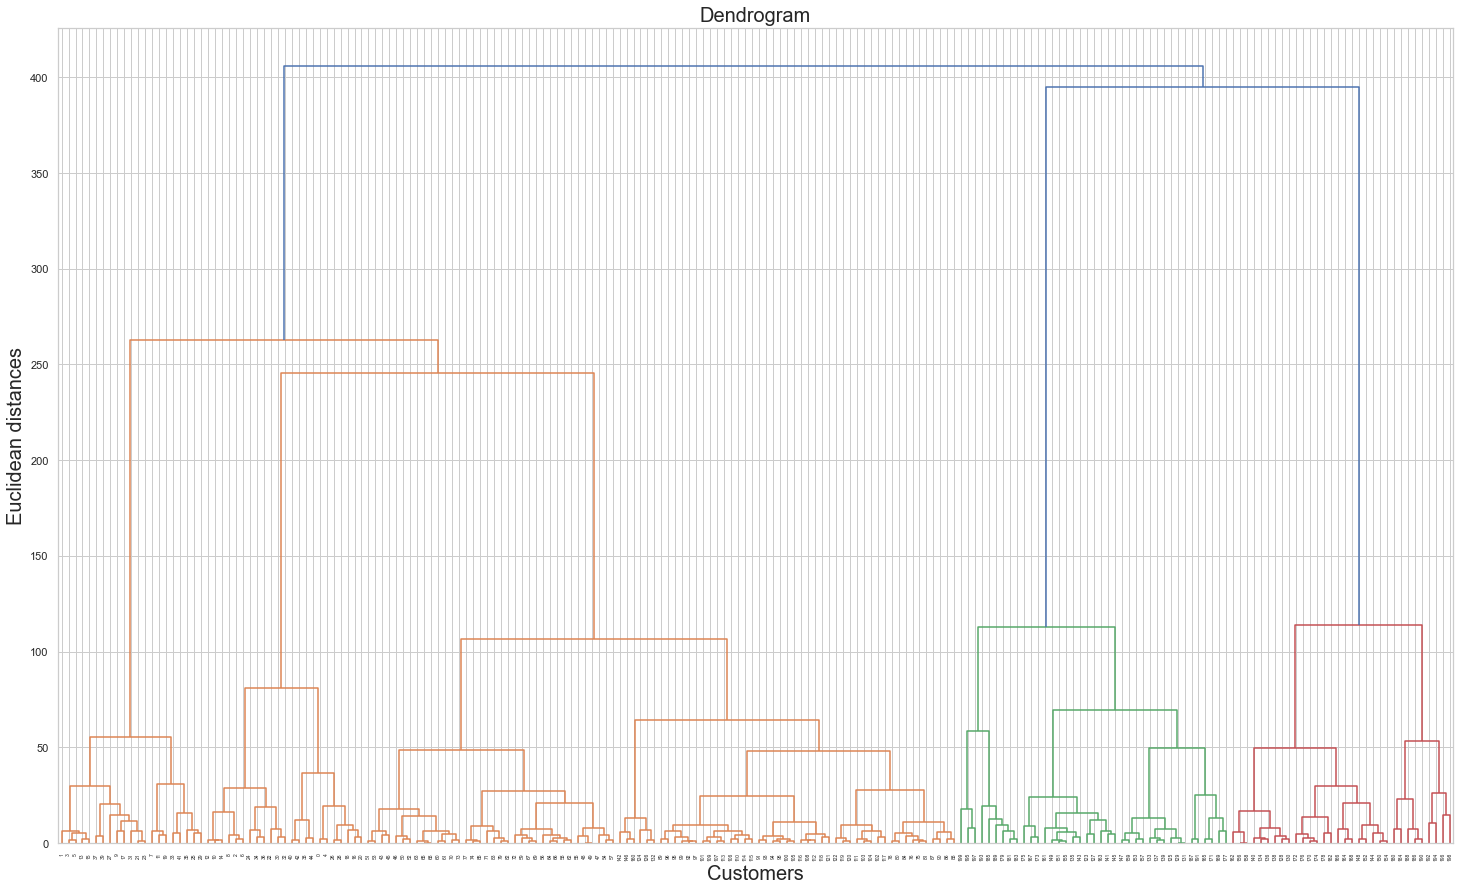

In [57]:

# Use the dendrogram to find the optimal number of clusters
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distances',fontsize=20)
plt.show()

In [58]:
# Train the Hierarchical Clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

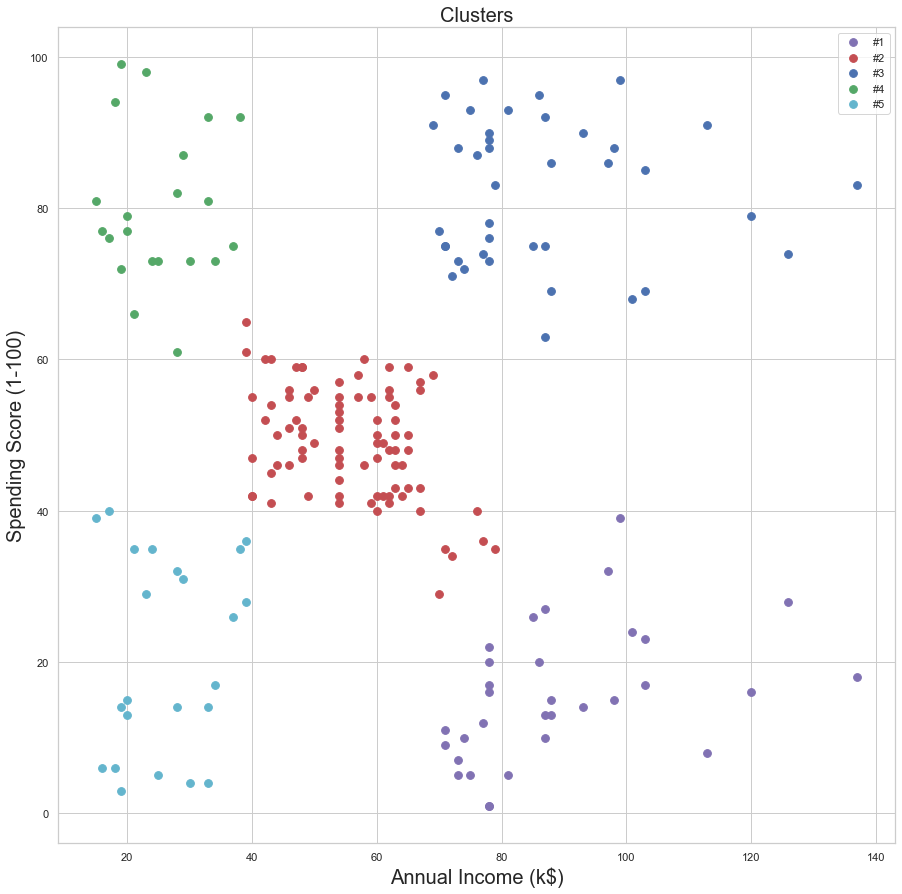

In [59]:
# Visualization of the clusters of customers
plt.figure(figsize=(15,15))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 60, c = 'm', label = '#1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 60, c = 'r', label = '#2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 60, c = 'b', label = '#3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 60, c = 'g', label = '#4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 60, c = 'c', label = '#5')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()


In [60]:
#DBSCAN

In [61]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.figure(figsize=(10,10))
    plt.title('Clusters',fontsize=20)
    plt.xlabel('Annual Income (k$)',fontsize=20)
    plt.ylabel('Spending Score (1-100)',fontsize=20)
    plt.legend()
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='coolwarm')
    plt.title("DBSCAN")

No handles with labels found to put in legend.


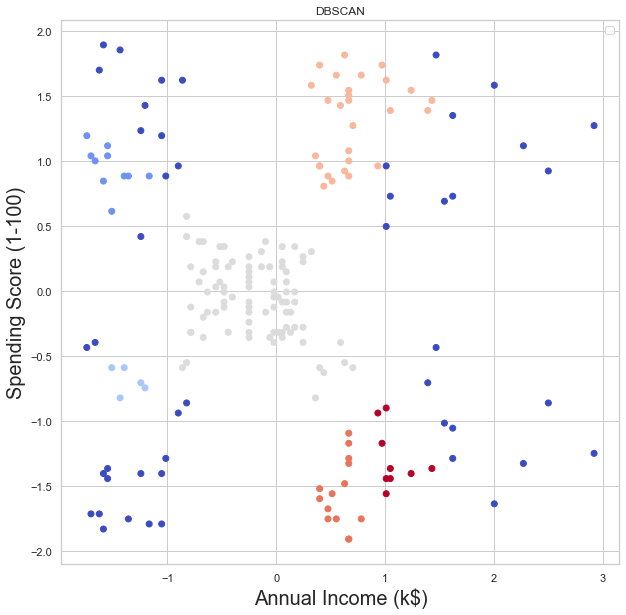

In [62]:
dbscan(X,eps=0.275,min_samples=5)

In [63]:
#BIRCH

No handles with labels found to put in legend.


Text(0.5, 1.0, 'BIRCH')

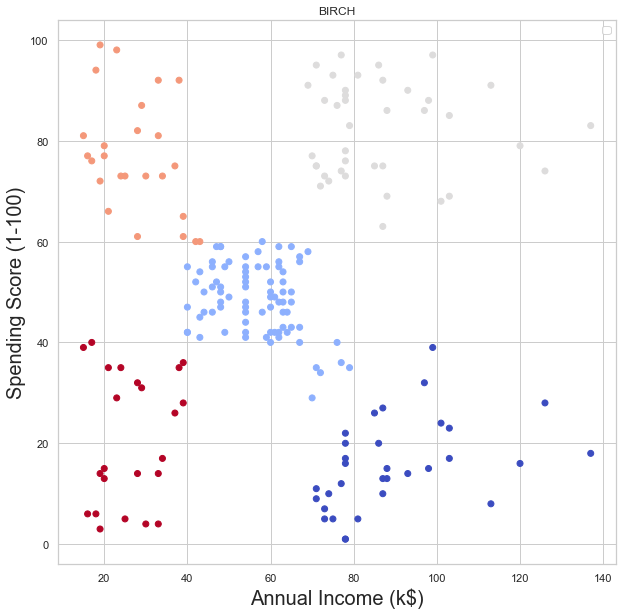

In [64]:
brc = Birch(n_clusters=5)
brc.fit(X)
brc_y_pred = brc.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=brc_y_pred, cmap='coolwarm')
plt.title("BIRCH")

In [65]:
#Affinity Propagation

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Affinity Propagation Model')

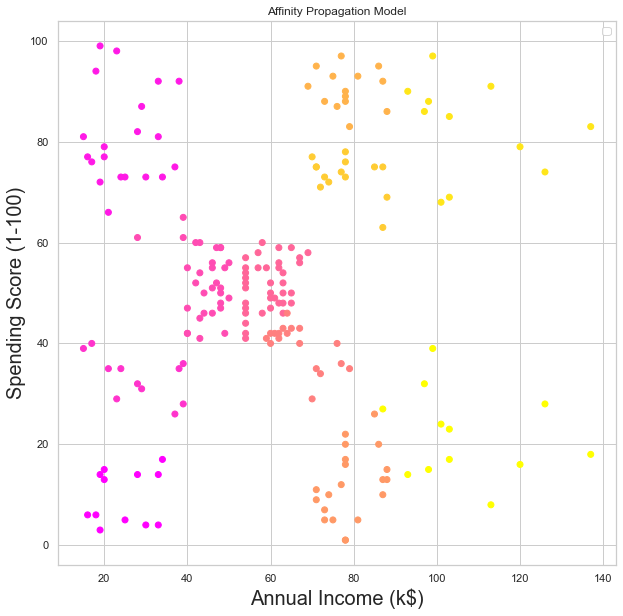

In [66]:
ap = AffinityPropagation(random_state=0)
ap.fit(X)
ap_y_pred = ap.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ap_y_pred, cmap='spring')
plt.title("Affinity Propagation Model")

In [67]:
#Mean Shift

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MeanShift Model')

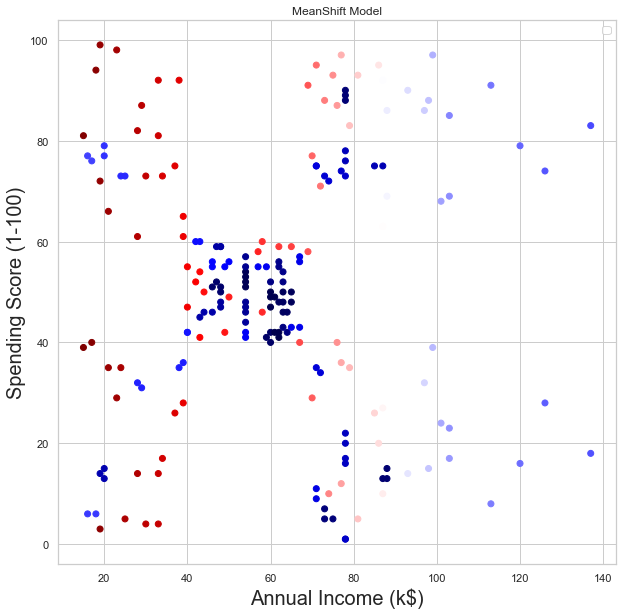

In [68]:
ms = MeanShift(bandwidth=2)
ms.fit(X)
ms_y_pred = ms.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ms_y_pred, cmap='seismic')
plt.title("MeanShift Model")

In [69]:
#OPTICS

No handles with labels found to put in legend.


Text(0.5, 1.0, 'OPTICS Model')

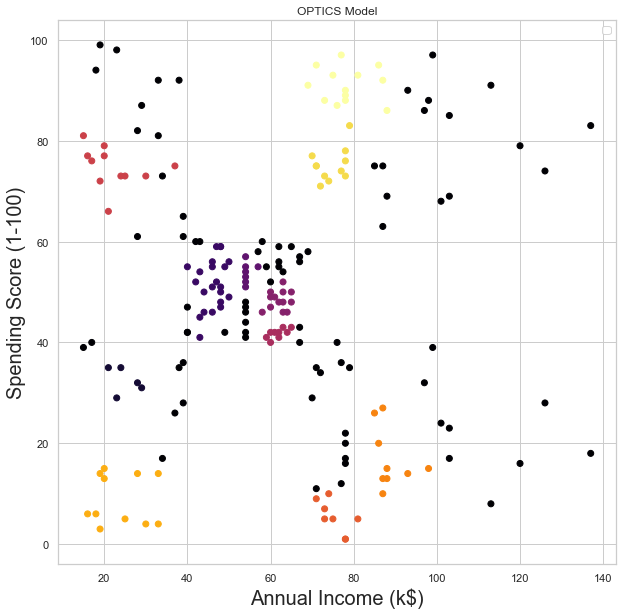

In [70]:
opt = OPTICS(min_samples=5)
opt_y_pred = opt.fit_predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=opt_y_pred, cmap='inferno')
plt.title("OPTICS Model")